In [6]:
#useful libraries for this analysis
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [7]:
#Load the data
data = pd.read_csv("delhiaqi.csv")

In [8]:
#see the data
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [9]:
#convert the date column in the dataset into a datetime data type and move forward:

data['date'] = pd.to_datetime(data['date'])

In [10]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


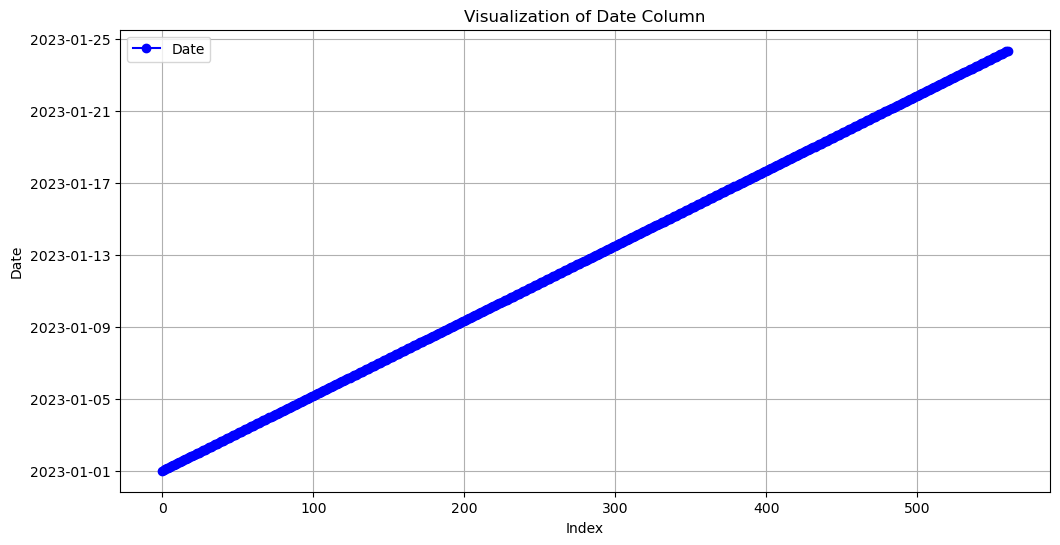

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with a 'date' column
data['date'] = pd.to_datetime(data['date'])

# Create a line plot of the date column
plt.figure(figsize=(12, 6))
plt.plot(data['date'], marker='o', linestyle='-', color='b', label='Date')

# Customize the plot
plt.title('Visualization of Date Column')
plt.xlabel('Index')
plt.ylabel('Date')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [16]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [31]:
'''I am creating a time series plot for each air pollutant in the dataset. 
It helps analyze the intensity of air pollutants over time.
Markers: I added markers to each data point for better visibility using mode='lines+markers'.

Line Width: I increased the line width for better visibility using line=dict(width=2).

Legend Placement: I adjusted the legend placement to the top of the plot for better readability.

Margin and Hovermode: I adjusted the plot margin and set hovermode to 'x unified' for better hover information.

Trendlines: I added trendlines for each pollutant using a rolling mean with a window of 7 days.'''


import plotly.graph_objects as go

fig = go.Figure()

for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    fig.add_trace(go.Scatter(x=data['date'], y=data[pollutant], mode='lines+markers', 
                             name=pollutant, line=dict(width=2)))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Delhi',
                  xaxis_title='Date', yaxis_title='Concentration (µg/m³)',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  margin=dict(l=0, r=0, t=60, b=20),
                  hovermode='x unified')

# Adding trendlines for each pollutant
for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    fig.add_trace(go.Scatter(x=data['date'], y=data[pollutant].rolling(window=7).mean(),
                             mode='lines', line=dict(dash='dash'), showlegend=False))

fig.show()


In [20]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
data['AQI'] = data.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)
print(data.head(10))

                 date       co     no    no2      o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41    5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16    1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87    0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55    0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24    5.45  39.10  266.36  322.80   
5 2023-01-01 05:00:00  3578.19  64.37  55.52   14.13  44.35  276.54  336.79   
6 2023-01-01 06:00:00  3578.19  46.94  76.09   33.26  50.54  295.40  357.07   
7 2023-01-01 07:00:00  1468.66   9.83  47.30  105.86  68.66  158.83  182.61   
8 2023-01-01 08:00:00  1161.58   5.81  35.99  125.89  61.99  134.39  153.47   
9 2023-01-01 09:00:00  1161.58   4.58  36.33  134.47  65.80  133.22  152.09   

     nh3  AQI    AQI Category  
0   5.83  300  Very Unhealthy  
1   7.66  300  Very Unhealthy  
2  11.40  400       Hazardous  
3 

In [21]:
# AQI over time
fig = px.bar(data, x="date", y="AQI", 
             title="AQI of Delhi in January")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="AQI")
fig.show()

In [22]:
fig = px.histogram(data, x="date", 
                    color="AQI Category", 
                    title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [23]:
# Define pollutants and their colors
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = data[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Delhi",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [24]:
# Correlation Between Pollutants
correlation_matrix = data[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, 
                 y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [25]:
# Extract the hour from the date
data['Hour'] = pd.to_datetime(data['date']).dt.hour

# Calculate hourly average AQI
hourly_avg_aqi = data.groupby('Hour')['AQI'].mean().reset_index()

# Create a line plot for hourly trends in AQI
fig = px.line(hourly_avg_aqi, x='Hour', y='AQI', 
              title='Hourly Average AQI Trends in Delhi (Jan 2023)')
fig.update_xaxes(title="Hour of the Day")
fig.update_yaxes(title="Average AQI")
fig.show()

In [32]:

import plotly.express as px

# Assuming you have a DataFrame named 'data' with columns 'date' and 'AQI'
data['date'] = pd.to_datetime(data['date'])
data['Day_of_Week'] = data['date'].dt.day_name()

average_aqi_by_day = data.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig = px.bar(average_aqi_by_day, 
             x=average_aqi_by_day.index, 
             y='AQI', 
             title='Average AQI by Day of the Week',
             labels={'AQI': 'Average AQI', 'x': 'Day of the Week'}
            )

# Set the width of the bars
fig.update_layout(bargap=0.5)

fig.show()
